# Pandas Dataframe Pivot: Gapminder

## Data source

Gapminder: https://www.gapminder.org/

Gapminder fights devastating misconceptions about global development and produces free teaching resources making the world understandable based on reliable statistics.

### The data file

- Direct link to the source data file: https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

First, load the data:

In [1]:
# pandas
import pandas as pd

source_data_url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
df_gapminder = pd.read_csv(source_data_url)
df_gapminder

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


We can use Pandas [`pd.pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to convert the tall table to a wide table, computing the mean __lifeExp__ across continents.

In [2]:
# We need for the aggfunc
import numpy as np

# simple example with pivot_table. Notice we used aggfunc=aggfunc=np.mean
pd.pivot_table(df_gapminder, values='lifeExp', columns='continent', aggfunc=np.mean)

continent,Africa,Americas,Asia,Europe,Oceania
lifeExp,48.86533,64.658737,60.064903,71.903686,74.326208


Similarly, we can use Pandas [`pd.pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to compute the mean __lifeExp__ per country.

In [3]:
# Pivot table on mean lifeExp
lifeExp_country = pd.pivot_table(df_gapminder, values='lifeExp', columns='country', aggfunc=np.mean)
lifeExp_country

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,Yemen Rep.,Zambia,Zimbabwe
lifeExp,37.478833,68.432917,59.030167,37.8835,69.060417,74.662917,73.10325,65.605667,49.834083,73.64175,...,47.618833,73.922583,73.4785,70.781583,66.580667,57.4795,60.328667,46.780417,45.996333,52.663167


Let's sort and plot countries in the top and bottom $n$ life-expectancy ranking:

In [4]:
# We first transpose and sort
lifeExp_sorted = lifeExp_country.T.reset_index().sort_values(by=['lifeExp'], ascending=False)
lifeExp_sorted

,country,lifeExp
57,Iceland,76.511417
122,Sweden,76.177000
95,Norway,75.843000
90,Netherlands,75.648500
123,Switzerland,75.565083
...,...,...
86,Mozambique,40.379500
52,Guinea-Bissau,39.210250
3,Angola,37.883500
0,Afghanistan,37.478833


In [5]:
# Top n to visualize
n = 15

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Figures spacing
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
ax2.set_xlim((0, lifeExp_sorted.head(n)['lifeExp'].max()))

# Barplots
sns.barplot(ax=ax1, y="country", x="lifeExp", palette="Blues_r", data=lifeExp_sorted.head(n))
sns.barplot(ax=ax2, y="country", x="lifeExp", palette="Reds",    data=lifeExp_sorted.tail(n))

We can also work with more than 2 columns:

In [7]:
# Select three columns from gapminder dataframe
df_gapminder_selection = df_gapminder[['continent', 'year','lifeExp']]
df_gapminder_selection

,continent,year,lifeExp
0,Asia,1952,28.801
1,Asia,1957,30.332
2,Asia,1962,31.997
3,Asia,1967,34.020
4,Asia,1972,36.088
...,...,...,...
1699,Africa,1987,62.351
1700,Africa,1992,60.377
1701,Africa,1997,46.809
1702,Africa,2002,39.989


In [8]:
# Pivot df_gapminder_selection 
lifeExp_year_continent = pd.pivot_table(df_gapminder_selection, values='lifeExp', index=['year'], columns='continent')
lifeExp_year_continent

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.2550
1957,41.266346,55.96028,49.318544,66.703067,70.2950
1962,43.319442,58.39876,51.563223,68.539233,71.0850
1967,45.334538,60.41092,54.663640,69.737600,71.3100
1972,47.450942,62.39492,57.319269,70.775033,71.9100
1977,49.580423,64.39156,59.610556,71.937767,72.8550
1982,51.592865,66.22884,62.617939,72.806400,74.2900
1987,53.344788,68.09072,64.851182,73.642167,75.3200
1992,53.629577,69.56836,66.537212,74.440100,76.9450


Plot using [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html):

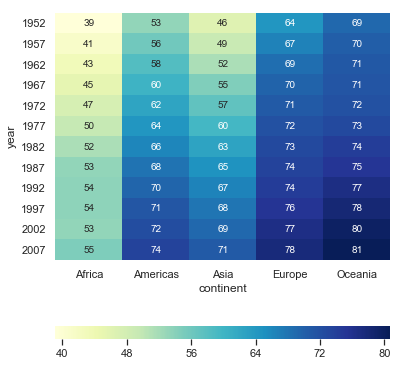

In [9]:
# Plot specs
grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(6, 6))
sns.heatmap(lifeExp_year_continent, annot=True,  cmap="YlGnBu",  ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})

Pivot table uses mean function for aggregating or summarizing data by default. Finally, we will demonstrate the use of different aggregation funtions:

In [10]:
# Pivot table with aggfunc='min'
pd.pivot_table(df_gapminder_selection, values='lifeExp', index=['year'], columns='continent',aggfunc='min')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,30.000,37.579,28.801,43.585,69.120
1957,31.570,40.696,30.332,48.079,70.260
1962,32.767,43.428,31.997,52.098,70.930
1967,34.113,45.032,34.020,54.336,71.100
1972,35.400,46.714,36.088,57.005,71.890
1977,36.788,49.923,31.220,59.507,72.220
1982,38.445,51.461,39.854,61.036,73.840
1987,39.906,53.636,40.822,63.108,74.320
1992,23.599,55.089,41.674,66.146,76.330


We can specify what aggregating function we want. Also we can use more than one aggregating functions. For example, if we are interested in bot minimum and maximum values of __lifeExp__ for each year and continent, we can specify the functions as a list to the argument:

In [11]:
# Pivot with multiple aggregating functions
pd.pivot_table(df_gapminder_selection, values='lifeExp',index=['year'],columns='continent', aggfunc=[min,max])

min                                      max                   \
continent  Africa Americas    Asia  Europe Oceania  Africa Americas    Asia   
year                                                                          
1952       30.000   37.579  28.801  43.585  69.120  52.724   68.750  65.390   
1957       31.570   40.696  30.332  48.079  70.260  58.089   69.960  67.840   
1962       32.767   43.428  31.997  52.098  70.930  60.246   71.300  69.390   
1967       34.113   45.032  34.020  54.336  71.100  61.557   72.130  71.430   
1972       35.400   46.714  36.088  57.005  71.890  64.274   72.880  73.420   
1977       36.788   49.923  31.220  59.507  72.220  67.064   74.210  75.380   
1982       38.445   51.461  39.854  61.036  73.840  69.885   75.760  77.110   
1987       39.906   53.636  40.822  63.108  74.320  71.913   76.860  78.670   
1992       23.599   55.089  41.674  66.146  76.330  73.615   77.950  79.360   
1997       36.087   56.671  41.763  68.835  77.550  74.772   78.610  80.690   
2002       39.193   58.137  42.129  70.845  79.110  75.744   79.770  82.000   
2007       39.613   60.916  43.828  71.777  80.204  76.442   80.653  82.603   

                           
continent  Europe Oceania  
year                       
1952       72.670  69.390  
1957       73.470  70.330  
1962       73.680  71.240  
1967       74.160  71.520  
1972       74.720  71.930  
1977       76.110  73.490  
1982       76.990  74.740  
1987       77.410  76.320  
1992       78.770  77.560  
1997       79.390  78.830  
2002       80.620  80.370  
2007       81.757  81.235